Loading the data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preprocessing:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
import numpy as np
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["gold", "green", "red"]) 

df = pd.read_csv('/content/drive/MyDrive/DV Project/adult.data', sep=", ", header=None)
df.columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Gender', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Salary']

print("# records having ? in WorkClass = " + str(df['WorkClass'].value_counts()['?']))
print("# records having ? in Occupation = " + str(df['Occupation'].value_counts()['?']))
print("# records having ? in NativeCountry = " + str(df['NativeCountry'].value_counts()['?']))

#Handle the rows having '?'
df.replace('?', 'Unknown')
df = df.dropna()
df

# records having ? in WorkClass = 1836
# records having ? in Occupation = 1843
# records having ? in NativeCountry = 583


,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
print("# records below 50K = " + str(df['Salary'].value_counts()['<=50K']))
print("# records above 50K = " + str(df['Salary'].value_counts()['>50K']))

# Random sampling for a more balanced dataset:
above50 = df.copy()
above50 = above50[above50['Salary']=='>50K']
below50 = df.copy()
below50 = below50[below50['Salary']=='<=50K']
below50 = below50.sample(7841)

print('After random sampling:')
df = above50.append(below50)
print("# records below 50K = " + str(df['Salary'].value_counts()['<=50K']))
print("# records above 50K = " + str(df['Salary'].value_counts()['>50K']))
df

# records below 50K = 24720
# records above 50K = 7841
After random sampling:
# records below 50K = 7841
# records above 50K = 7841


,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19564,43,Local-gov,196308,HS-grad,9,Divorced,Exec-managerial,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K
24176,39,State-gov,218249,Some-college,10,Separated,Prof-specialty,Unmarried,Black,Female,0,0,37,United-States,<=50K
14201,30,Private,149368,HS-grad,9,Divorced,Sales,Unmarried,White,Male,1151,0,30,United-States,<=50K
8281,48,State-gov,99086,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K


Helper functions:

In [6]:
def count_absolute(concatenate_dataset, colname):
    col_income = concatenate_dataset.groupby([colname,'Salary']).size().unstack(level=0).T
    col_income[colname] = col_income.T.columns
    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K'].tolist(),
            '>50K':col_income['>50K'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [7]:
def salary_compare(labels, less_than_fifty, greater_than_fifty, title, xlabel, ylabel, reduce_clutter):

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    fig, ax = plt.subplots(figsize=(12,10))
    
    # multiple bar:
    # rects1 = ax.bar(x - width/2, less_than_fifty, width, label='Salary <=50K')
    # rects2 = ax.bar(x + width/2, greater_than_fifty, width, label='Salary >50K')

    # stacked bar:
    rects1 = ax.bar(x, less_than_fifty, width, label='Salary <=50K', color='gold')
    rects2 = ax.bar(x, greater_than_fifty, width, bottom=less_than_fifty, label='Salary >50K', color='green')
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.xticks(rotation=30)

    ax.set_xticks(x)
        
    fig.tight_layout()
    
    # fig.tight_layout()


    plt.show()

In [8]:
def count_norm(concatenate_dataset, colname, percent=True):
    col_income = concatenate_dataset.groupby([colname,'Salary']).size().unstack(level=0).T
    #Normalize data
    col_income['Total'] = col_income['<=50K'] + col_income['>50K']
    
    if (percent):        
        col_income['<=50K%'] = round((col_income['<=50K'] / col_income['Total']) * 100)
        col_income['>50K%'] = round((col_income['>50K'] / col_income['Total']) * 100)
    else:
        col_income['<=50K%'] = col_income['<=50K'] / col_income['Total']
        col_income['>50K%'] =  col_income['>50K'] / col_income['Total']
            
    col_income[colname] = col_income.T.columns

    #Put data in a new data frame
    dict = {colname:col_income.T.columns.tolist(),
            '<=50K': col_income['<=50K%'].tolist(),
            '>50K':col_income['>50K%'].tolist()}
    col_income_dict = pd.DataFrame(dict)
    
    return col_income_dict

In [9]:
def plot_bar_chart(colname, title, xlabel, ylabel, abs_or_norm = False, reduce_clutter=False):
    col_income_dict = count_norm(df, colname) 
    salary_compare(col_income_dict[colname].tolist(), col_income_dict['<=50K'].tolist(), col_income_dict['>50K'].tolist(), title, xlabel, ylabel, reduce_clutter)

**User Stories:**

User Story #1: Does a person’s Marital Status have any relation with their Salary?

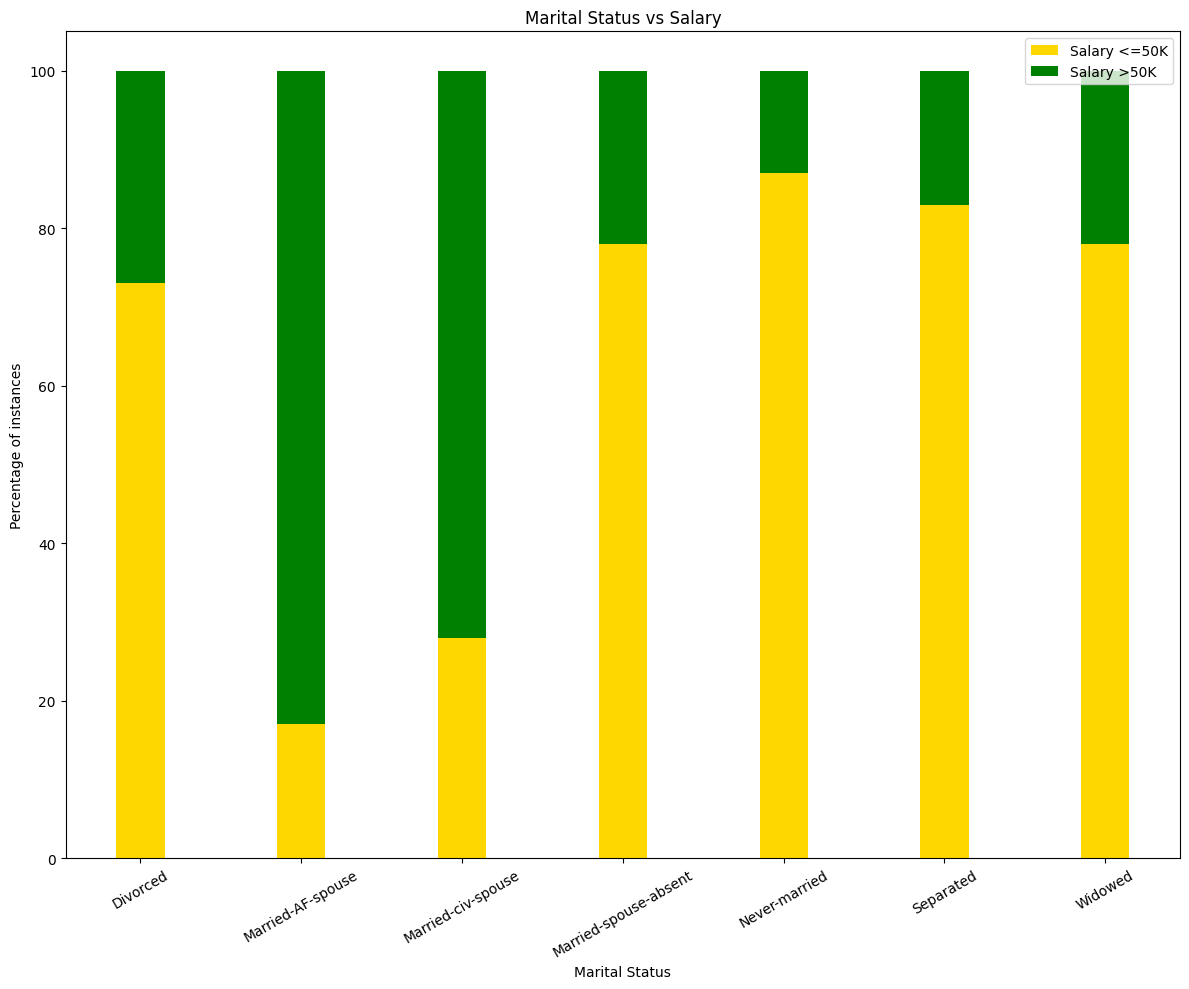

In [10]:
plot_bar_chart('MaritalStatus', 'Marital Status vs Salary', 'Marital Status', 'Percentage of instances')

# Analysis:
# Individuals are more likely to earn a salary of >50K if they are married with spouse present.
# Unmarried inviduals or married individuals with spouse absent are more likely to earn a salary of <=50K.

User Story #2: Does a person’s Number of Years of Education have any relation with their Salary?

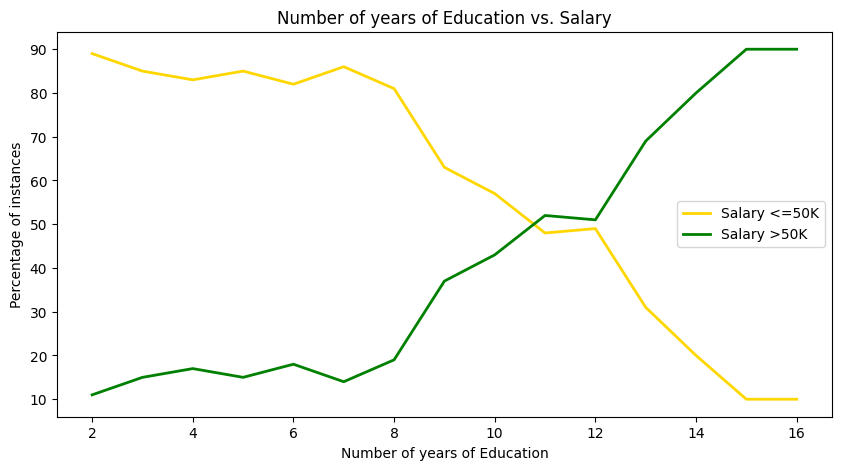

In [22]:
educationNum_vs_income = count_norm(df, 'EducationNum')
plt.figure(figsize=(10,5))
plt.plot('EducationNum', '<=50K', data=educationNum_vs_income, color='gold', linewidth=2, label='Salary <=50K')
plt.plot('EducationNum', '>50K', data=educationNum_vs_income,  color='green', linewidth=2, label='Salary >50K')
plt.title("Number of years of Education vs. Salary")
plt.xlabel("Number of years of Education")
plt.ylabel("Percentage of instances")
plt.legend()
plt.show()

# Analysis:
# There is a clear increasing trend in the percentage of people with salary > 50K as the number of years of education increases for an individual.
# The increase in percentage of people with salary >50K (correspondingly the decrease in percentage of people with salary <=50K) is very less up to 8 years of education.
# The percentage of people with salary >50K increases more steadily (correspondingly the percentage of people with salary <=50K decreases more steadily) as years of education increases from 8 to 12 years.
# The percentage of people with salary >50K increases dramatically (correspondingly the percentage of people with salary <=50K decreases dramatically) as years of education increases from 12 to 16 years.

User Story #3: Does a person’s combined Race & Relationship have any relation with their Salary?

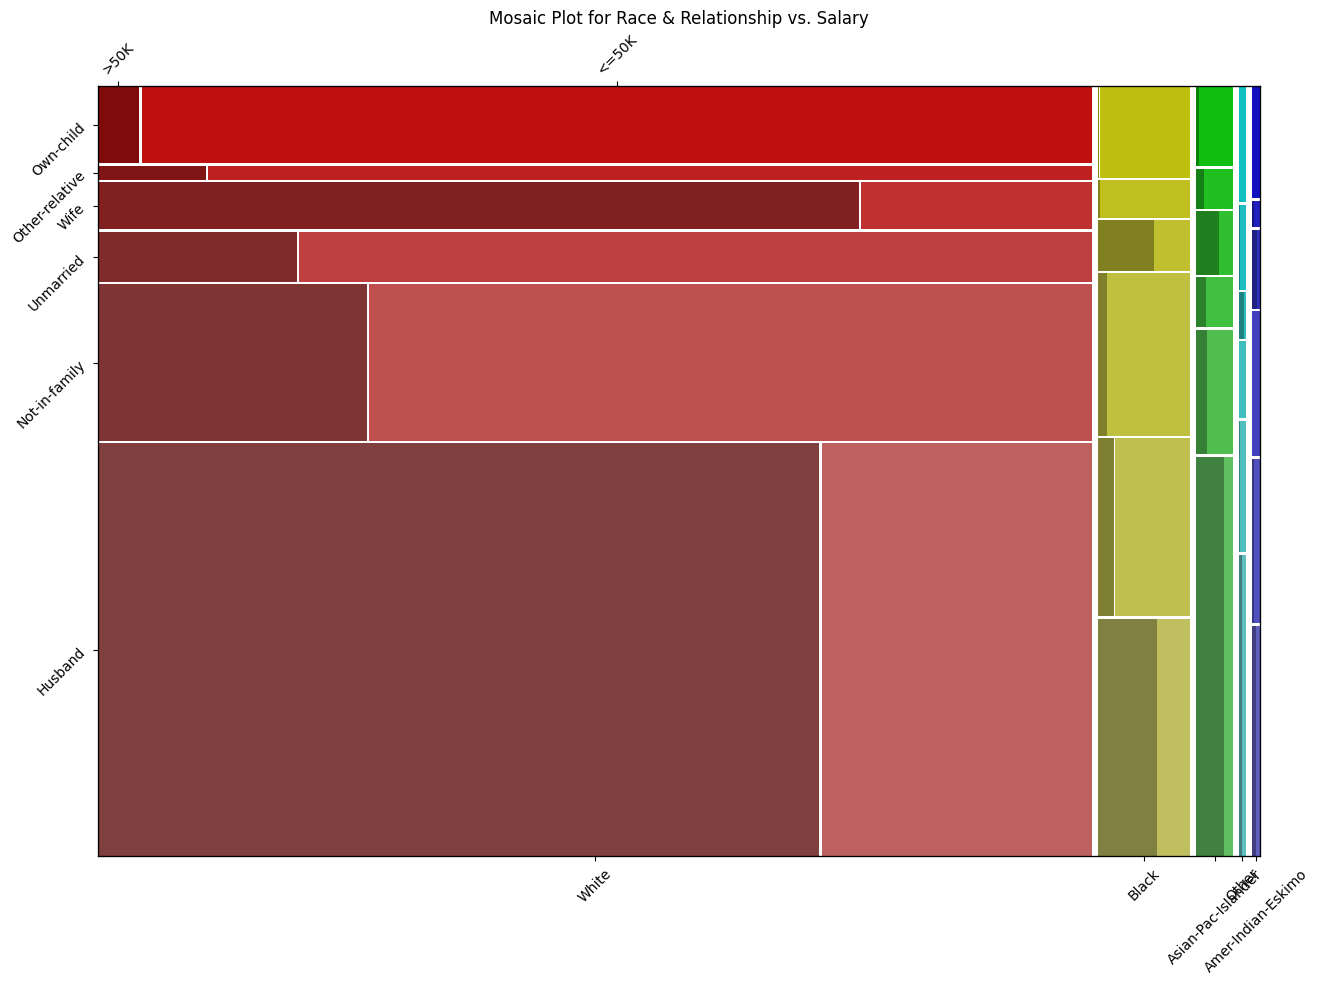

In [12]:
from statsmodels.graphics.mosaicplot import mosaic

def emptyLabelMosaic(k):
    return ''

fig, ax = plt.subplots()
fig.set_size_inches(15, 10, forward=True)
fig, _= mosaic(df, ['Race','Relationship', 'Salary'], ax = ax, title= 'Mosaic Plot for Race & Relationship vs. Salary', labelizer=emptyLabelMosaic, label_rotation=45.0)

# Analysis:
# An individual who is a Wife or Husband tends to earn >50k with more probability than individuals in other categories.
# For individuals who are unmarried or not-in-family, black people tend to earn >50k with lesser probability than white people in this category.

User Story #4: Does a person’s combined Capital Gain & Hours Worked Per Week have any relation with their Salary?

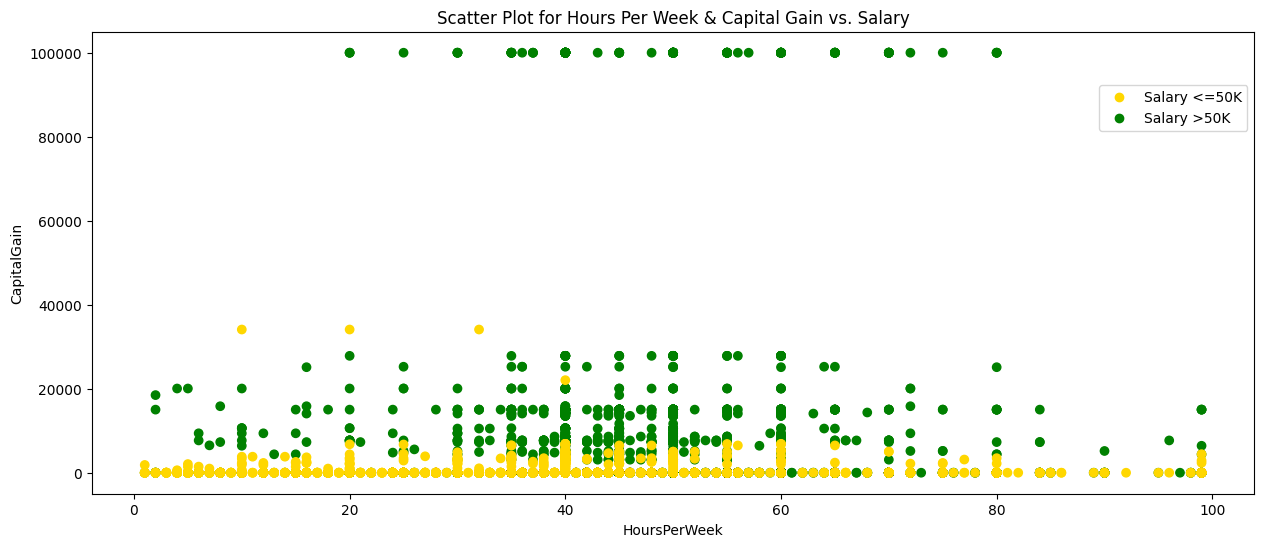

In [16]:
from matplotlib.colors import ListedColormap
df['class'] = (df["Salary"] == ">50K")*1
classes = ['Salary <=50K', 'Salary >50K']
# colors = df['class'].apply(lambda x: 'green' if x == 1 else 'gold')
colors = ListedColormap(['gold','green'])
x = df['HoursPerWeek']
y = df['CapitalGain']
plt.figure(figsize=(15,6))
scatter = plt.scatter(x,y,c=df['class'], cmap=colors)
plt.title("Scatter Plot for Hours Per Week & Capital Gain vs. Salary")
plt.xlabel('HoursPerWeek')
plt.ylabel('CapitalGain')
plt.legend(handles=scatter.legend_elements()[0], labels=classes, bbox_to_anchor=(1, 0.9))
plt.show()

# Analysis:
# Apart from some outliers, it can be observed that there is a disparity in salary between individuals with higher capital gain and individuals with lower capital gain.
# Individuals with low capital gain have a salary of <=50K with more probability.
# Individuals with high capital gain have a salary of >50K with more probability.
# This trend is similar for individuals working across various hours per week.
# It is most common for individuals to earn a salary of >50K if they are working 30 to 60 hours per week with a moderate capital gain.
# It is almost certain for indivualds to earn a salary of >50K if their capital gain is very high, regardless of the number of hours they work per week.

User Story #5: Does a person’s combined Age & Gender have any relation with their Salary?

In [ ]:
import plotly.express as px
df4 = df[['Gender', 'Age']].copy()
df4.loc[df.Age > 45, 'Age'] = '> 45'
df4.loc[df.Age <= 45, 'Age'] = '<= 45'
df4.loc[df.Salary == ">50K", 'Salary'] = '>50K'
df4.loc[df.Salary == "<=50K", 'Salary'] = '<=50K'
df4['Salary colormap'] = (df["Salary"] == ">50K")*1
df4['Age colormap'] = (df["Age"] > 45 )*1
df4['Gender colormap'] = (df["Gender"] == 'Male' )*1
colors = df['Gender'].apply(lambda x: 'gold' if x == 'Male' else 'green')
# fig = px.parallel_categories(df4, color="Salary colormap", dimensions=['Gender', 'Age', 'Salary'], title="Parallel Set Plot for Gender vs. Age")
# fig.show()
fig = px.parallel_categories(df4, color=colors, dimensions=['Gender', 'Age', 'Salary'], title="Parallel Set Plot for Gender & Age vs. Salary", height=700)
fig.show()
# fig = px.parallel_categories(df4, color="Salary colormap", dimensions=['Salary','Gender', 'Age'], title="Parallel Set Plot for Gender vs. Age")
# fig.show()

# Analysis:
# Women of all ages are less likely to earn >50K  than they are to earn <=50K.
# It can be observed that for people over the age of 45, men are much more likely to earn >50K.
# However, women over the age of 45 are not as likely to earn >50K as men of that category.
# For people less than 45 years of age, men are equally likely to earn either >50K or <=50K 
# However, more women of age less than 45 years earn <=50K than women of that category who earn >50K.

Additional analysis:

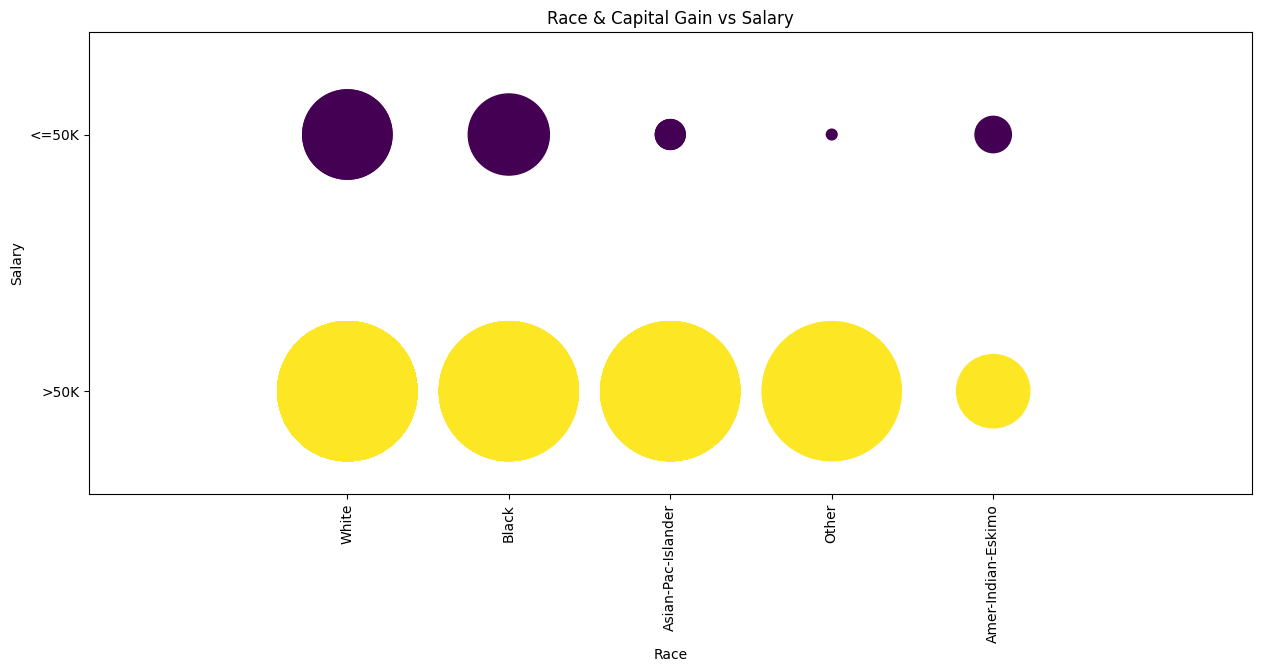

In [ ]:
# Race & Capital Gain
df6 = df[['Race', 'Salary', 'CapitalGain']].copy()
df6["CapitalGain"] *= 0.1
df6['Salary 0/1'] = (df["Salary"] == ">50K")*1
plt.figure(figsize=(15,6))
plt.scatter(x="Race", y="Salary", s="CapitalGain", data=df6, c="Salary 0/1")
plt.margins(.4)
plt.xticks(rotation=90)
plt.title("Race & Capital Gain vs Salary")
plt.xlabel('Race')
plt.ylabel('Salary')
plt.annotate('Capital Gain', xy=(1,12))
plt.show()

Text(0.5, 1.0, 'Box plot for salaray above 50K - Age ')

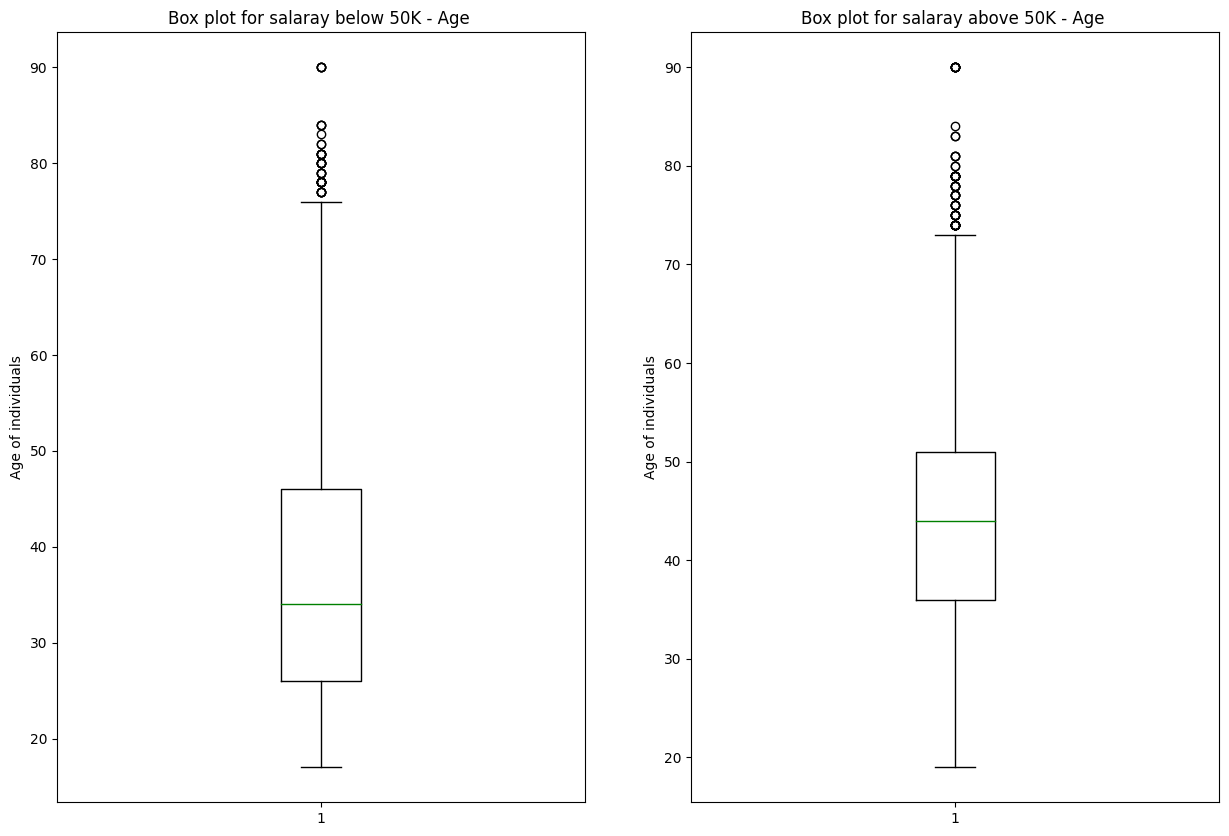

In [ ]:
# Age
below_50K = df[df["Salary"] == "<=50K"]
above_50K = df[df["Salary"] == ">50K"]
below_50K_age = list(below_50K['Age'])
above_50K_age = list(above_50K['Age'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
axes[0].boxplot(below_50K_age)
axes[0].set_ylabel("Age of individuals")
axes[0].set_title("Box plot for salaray below 50K - Age ")
axes[1].set_ylabel("Age of individuals")
axes[1].boxplot(above_50K_age)
axes[1].set_title("Box plot for salaray above 50K - Age ")

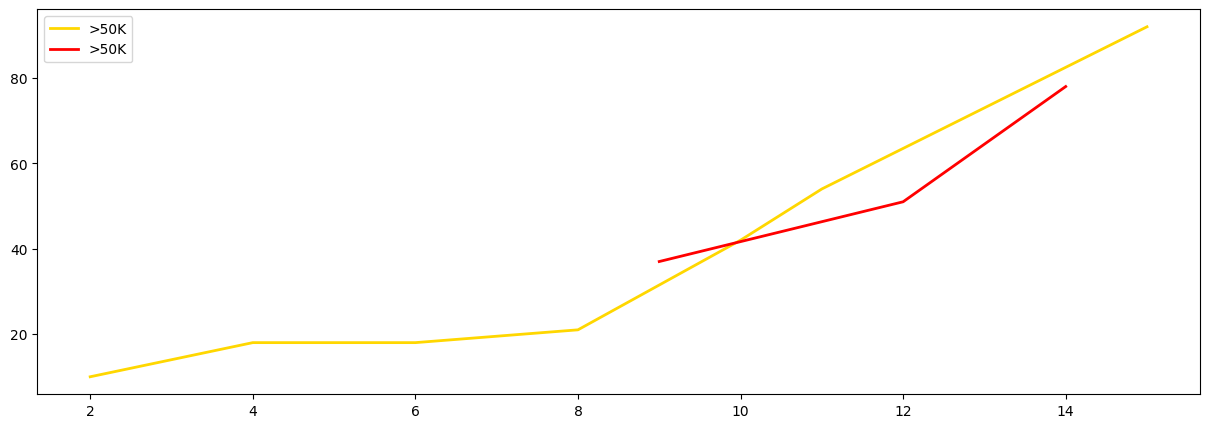

In [ ]:
# age and education num
educationNum_vs_income = count_norm(df, 'EducationNum')
educationNum_vs_income['Age'] = df['Age']
gr_35 = educationNum_vs_income[educationNum_vs_income['Age']>=35]
le_35 = educationNum_vs_income[educationNum_vs_income['Age']<35]
plt.figure(figsize=(15,5))
plt.plot('EducationNum', '>50K', data=gr_35, color='gold', linewidth=2)
plt.plot('EducationNum', '>50K', data=le_35, color='red', linewidth=2)
# plt.plot('EducationNum', '>50K', data=educationNum_vs_income,  color='green', linewidth=2)
plt.legend()
plt.show()

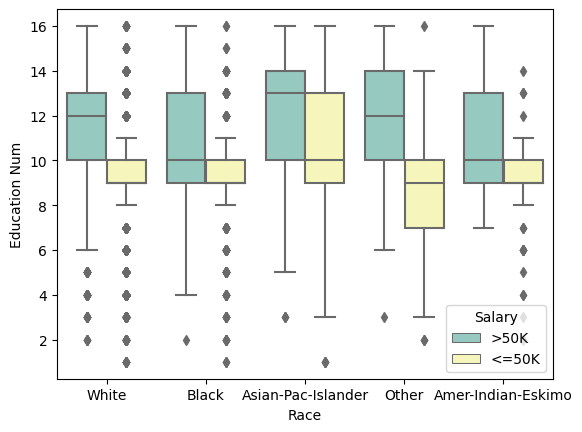

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df7=df.copy()
df7['CapitalGain'] *= 0.00001
sns.boxplot(x="Race", y="EducationNum", hue="Salary", data=df7, palette="Set3")
plt.xlabel("Race")
plt.ylabel("Education Num")
plt.show()

Redundant Features:

Text(0.5, 1.0, 'Box plot for salaray above 50K - FNLWGT ')

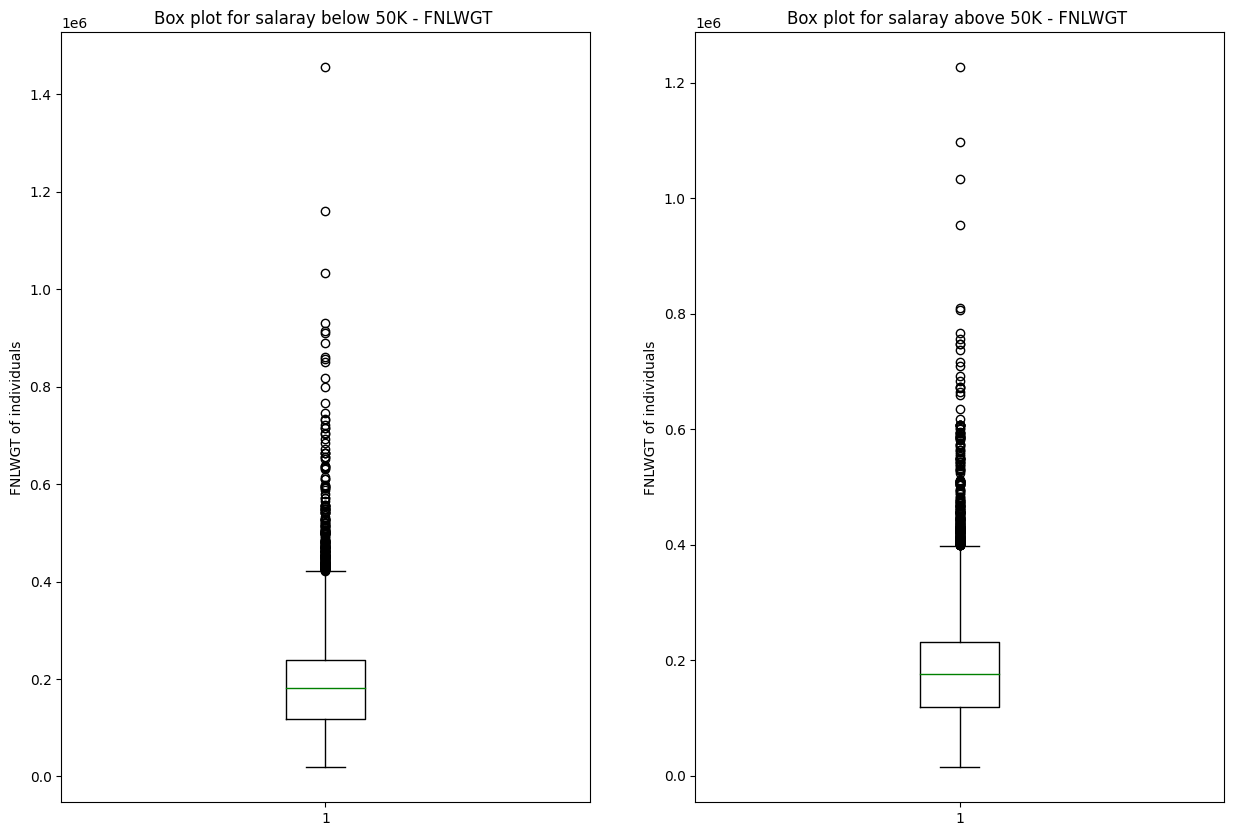

In [ ]:
# redundant - FNLWGT:
below_50K = df[df["Salary"] == "<=50K"]
above_50K = df[df["Salary"] == ">50K"]
below_50K_age = list(below_50K['FNLWGT'])
above_50K_age = list(above_50K['FNLWGT'])
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
axes[0].boxplot(below_50K_age)
axes[0].set_ylabel("FNLWGT of individuals")
axes[0].set_title("Box plot for salaray below 50K - FNLWGT ")
axes[1].set_ylabel("FNLWGT of individuals")
axes[1].boxplot(above_50K_age)
axes[1].set_title("Box plot for salaray above 50K - FNLWGT ")